<a href="https://colab.research.google.com/github/JeongCheolHee/machinelearning/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%2B%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state= 42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [3]:
#풀링 = 특성맵의 크기를 줄이는 역할
model.add(keras.layers.MaxPool2D(2))

In [4]:
from keras.api._v2.keras import activations
#필터의 개수만큼 특성맵의 깊이가 결정됨
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

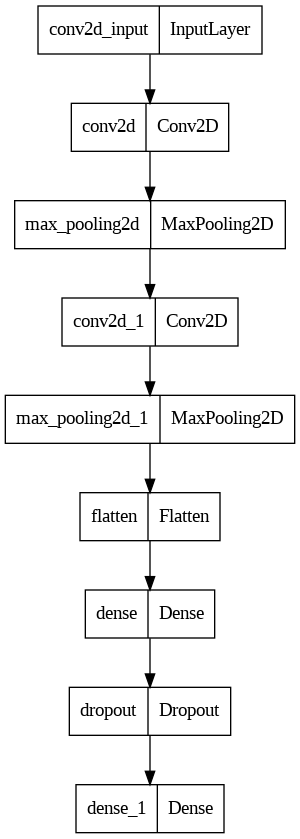

In [7]:
keras.utils.plot_model(model)

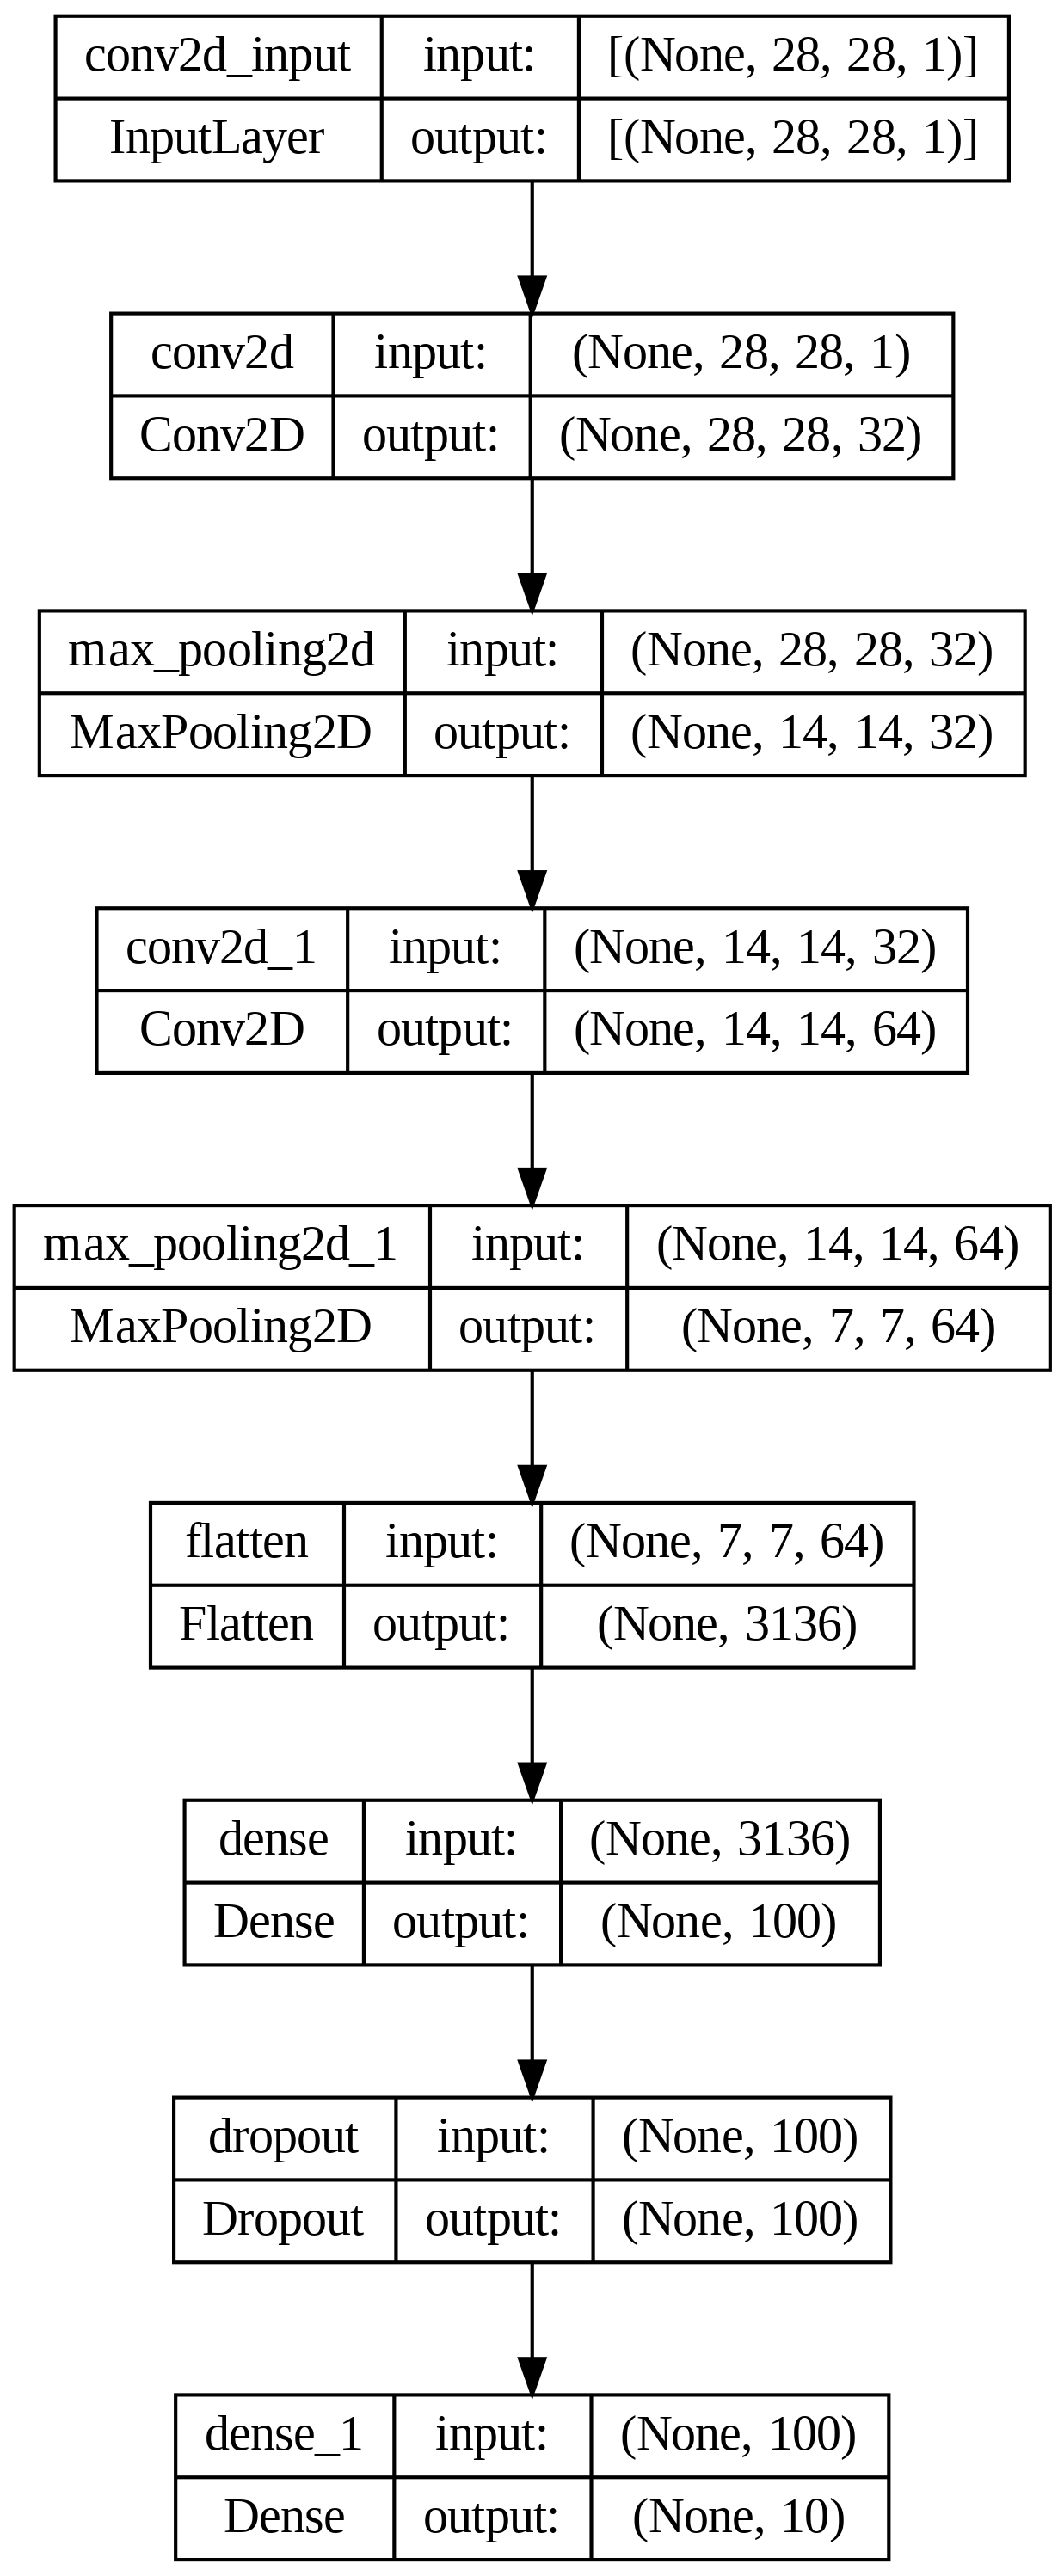

In [8]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn-architeture.png', dpi = 300)

In [9]:
#모델 컴파일과 훈련
model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)
histroy = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 92s 59ms/step - loss: 0.5489 - accuracy: 0.8037 - val_loss: 0.3396 - val_accuracy: 0.8762
Epoch 2/20
1500/1500 [==============================] - 83s 55ms/step - loss: 0.3653 - accuracy: 0.8667 - val_loss: 0.2934 - val_accuracy: 0.8904
Epoch 3/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.3137 - accuracy: 0.8854 - val_loss: 0.2683 - val_accuracy: 0.8996
Epoch 4/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.2820 - accuracy: 0.8975 - val_loss: 0.2511 - val_accuracy: 0.9066
Epoch 5/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2606 - accuracy: 0.9055 - val_loss: 0.2397 - val_accuracy: 0.9098
Epoch 6/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.2372 - accuracy: 0.9121 - val_loss: 0.2319 - val_accuracy: 0.9148
Epoch 7/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2206 - accuracy: 0.9190 - val_loss: 0.2306 -

In [10]:
#합성곱 신경망의 동작 원리에 대한 통찰을 키울 수 있음

In [11]:
#가중치 시각화 
'''가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함'''

'가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 함'

In [12]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [13]:
model.layers

In [14]:
#층의 가중치와 절편은 층의 weights 속성에 저장
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
'''이전 절에서 커널 크기를 (3,3)으로 지정했고 입력의 깊이가 1이므로 실제 커널의 크기는 (3,3,1)
   또한 필토의 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는(3,3,1,32) weights의 두 번째 원소는 절편의 개수를 나타냄 필터마다 1개의 절편이 있으므로(32,)의 크기'''



(3, 3, 1, 32) (32,)


'이전 절에서 커널 크기를 (3,3)으로 지정했고 입력의 깊이가 1이므로 실제 커널의 크기는 (3,3,1)\n   또한 필토의 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는(3,3,1,32) weights의 두 번째 원소는 절편의 개수를 나타냄 필터마다 1개의 절편이 있으므로(32,)의 크기'

In [15]:
#가중치 배열의 평균과 표준편차 계산
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03039082 0.28739494


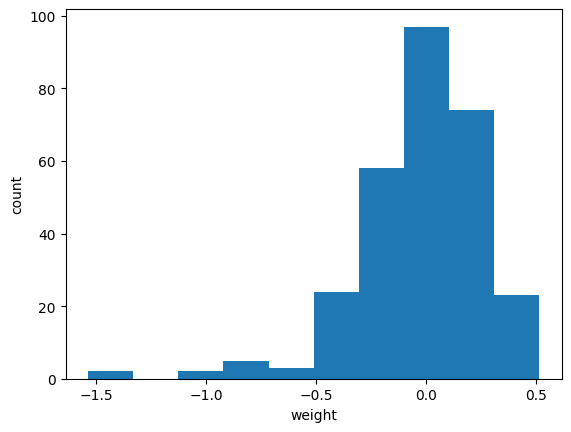

In [16]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1)) #맷플롯립의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야함
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

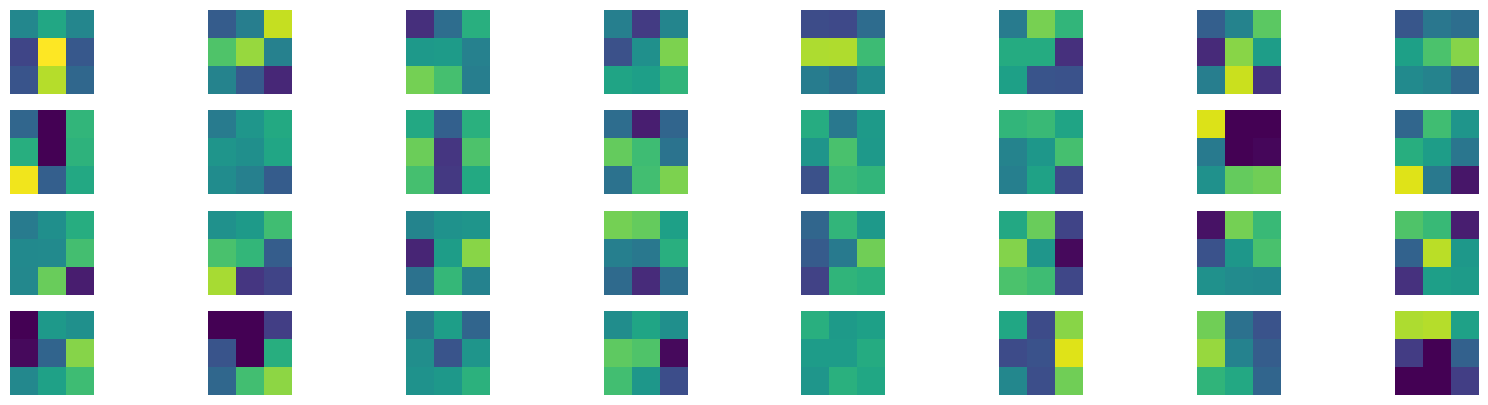

In [42]:
#커널 출력 16개씩 2줄
fig, axs = plt.subplots(4, 8, figsize=(20,5))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(conv_weights[:,:,0,i*8 + j], vmin = -0.5, vmax = 0.5) #vmin vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정
    axs[i,j].axis('off')
plt.show()
#fig 액자, axs 실제 데이터가 그려지는 캔버스

In [18]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape=(28,28,1)))  

In [19]:
  no_traning_conv = no_training_model.layers[0]
  print(no_traning_conv.weights[0].shape)

(3, 3, 1, 32)


In [20]:
no_traning_weights = no_traning_conv.weights[0].numpy()
print(no_traning_weights.mean(), no_traning_weights.std()) #평균운 0에 가깝지만 표준편차는 이전과 달리 매우 작다

0.00023048889 0.08376576


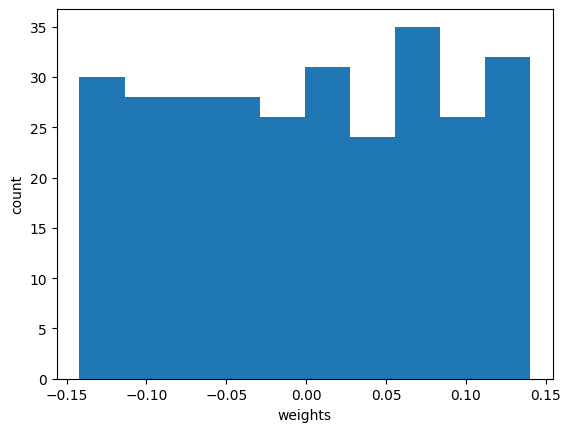

In [22]:
plt.hist(no_traning_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show() #비교적 고른 분포를 따르는 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

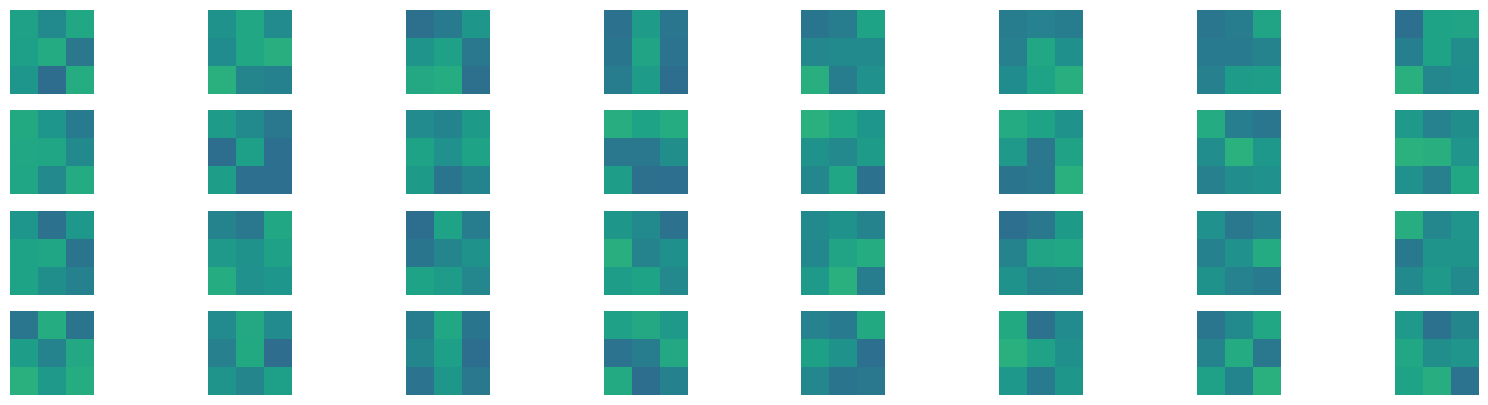

In [41]:
fig, axs = plt.subplots(4, 8, figsize=(20,5))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(no_traning_weights[:,:,0,i*8 + j], vmin = -0.5, vmax = 0.5) #vmin vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정
    axs[i,j].axis('off')
plt.show()

In [24]:
#합성곱 신경망의 학습을 시각화하는 두 번째 방법은 합성곱 층에서 출력된 특성 맵을 그려 보는 것

In [25]:
#딥러닝의 경우 복잡한 모델이 존재, 예를 들어 입력이 2개이고 출력이 2개일 경우가 있는데, 이 경우 Sequential 클래스를 사용하기 어렵고 함수형 API를 사용해야 됨

In [26]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [28]:
conv_acti = keras.Model(model.input, model.layers[0].output)  #conv2D의 input과 output으로만 이뤄진 신경망

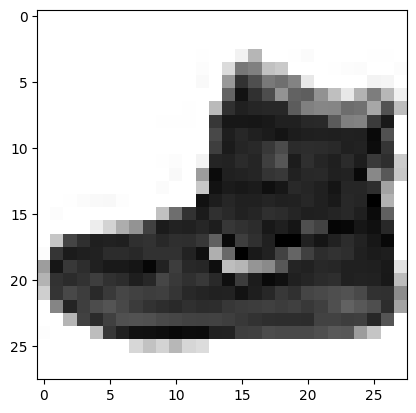

In [30]:
#훈련세트에 있는 첫 번째 샘플
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

In [32]:
#위 샘플을 conv_acti 모델에 주입해 Conv2D 층이 만드는 특성 맵을 출력해보기
inputs = train_input[0:1].reshape(-1,28,28,1) /255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 24ms/step


In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


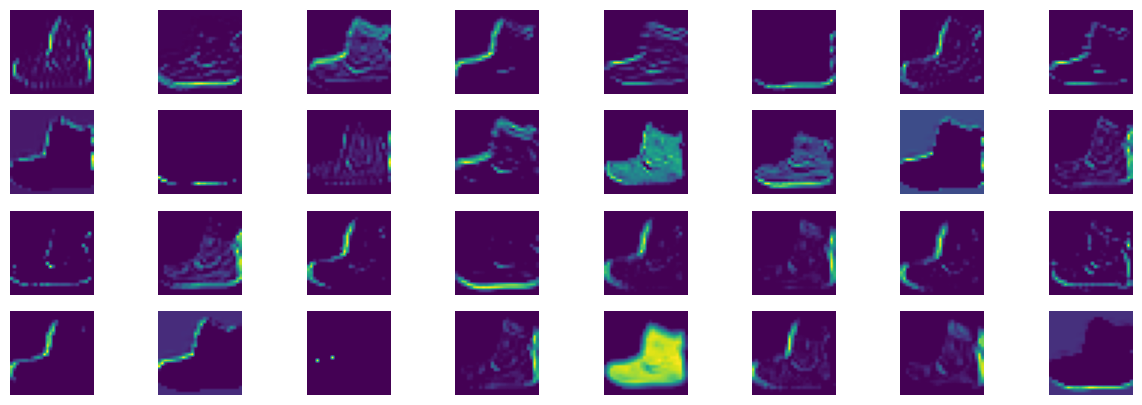

In [40]:
fig, axs = plt.subplots(4, 8, figsize=(15,5))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()
#이 특성맵은 32개의 필터로 인해 입력 이미지에서  강하게 활성화된 부분을 보여준다